# Name: [    ]
## ID: [   ]

# <center><font color=darkred>Lab 2 </font>

# Lab Goals:
    1. Quick overview of some examples in lecture2(part1).
    2. Work with hands-on examples such as:(Negative,Log,power low and piecewise linear Transformation + Histogram processing).

# <font color=darkred size=4>1-Needed Packages

In [1]:
from skimage import data, io
from matplotlib import pyplot as plt
import numpy as np
from math import log
from skimage import img_as_ubyte,img_as_float
from skimage.util import invert
from skimage import exposure
from skimage.exposure import equalize_hist
from matplotlib.pyplot import imread, imshow, show, subplot, title, get_cmap, hist

# Camera Image show:

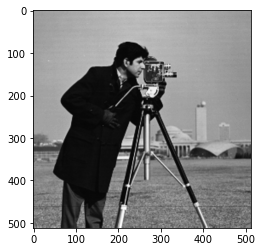

In [77]:
camera = data.camera()
plt.imshow(camera,'gray',vmin=0, vmax=255 )
plt.show()

# Invert the camera image:

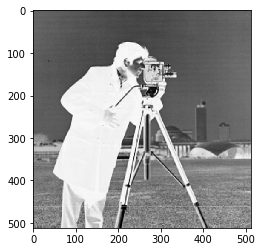

In [3]:
invcamera = invert(camera)
plt.imshow(Image_Negative(camera)'gray',vmin=0, vmax=255 )

# Task1: implement invert function and show the result?
def Image_Negative(img):
    ..........
    ..........
    
    
    return output

### Image Negatives:
    Image negatives are discussed in this article. Mathematically, assume that an image goes from intensity levels 0 to (L-1). Generally, L = 256. Then, the negative transformation can be described by the expression s = L-1-r where r is the initial intensity level and s is the final intensity level of a pixel.

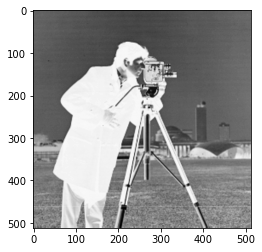

In [8]:
def Image_Negative(img):
    image = np.copy(img)
    
    for i in range(image.shape[0]) :
        for j in range(image.shape[1]):
            image[i][j] = 255 - image[i][j]
    
    return image

plt.imshow(Image_Negative(camera),'gray',vmin=0, vmax=255)

# Apply Log transformation,gamma to image and show the result:

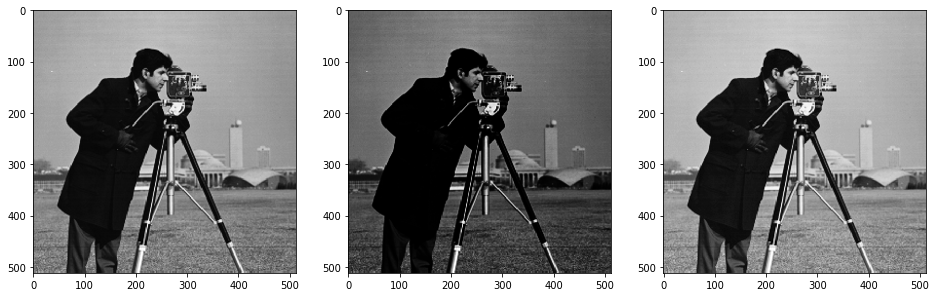

In [7]:
# Gamma
gamma_corrected = exposure.adjust_gamma(camera, 2)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(camera, 1)

# Display results

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 8)
ax1.imshow(camera, cmap=plt.cm.gray)
ax2.imshow(gamma_corrected, cmap=plt.cm.gray)
ax3.imshow(logarithmic_corrected, cmap=plt.cm.gray)
plt.show()

# Try different gamma and log transformation parameters and show the result (Write your observation):

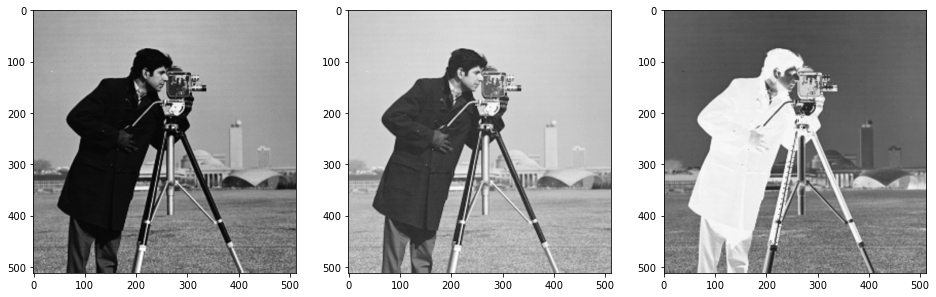

In [42]:
# Gamma
gamma_corrected = exposure.adjust_gamma(camera,0.5)

# Logarithmic
logarithmic_corrected = exposure.adjust_log(camera,-0.9)

# Display results

fig, (ax1,ax2,ax3) = plt.subplots(1, 3)
fig.set_size_inches(16, 8)
ax1.imshow(camera,cmap=plt.cm.gray)
ax2.imshow(gamma_corrected,cmap=plt.cm.gray)
ax3.imshow(logarithmic_corrected,cmap=plt.cm.gray)
plt.show()

In [26]:
# Write Your Observation:
gamma >> darkness || (0 > gamma < 1)  >> brightness || (no negative)
log >> contrast (negative is inverting)



SyntaxError: invalid syntax (<ipython-input-26-d00ee91adaf5>, line 2)

# Task2: Implement Log Transformation Function to image and show the result.
def Image_Log(img):
    ..........
    ..........
    
    
    return output

### Log Transformation:
     Mathematically, log transformations can be expressed as s = clog(1+r). Here, s is the output intensity, r>=0 is the input intensity of the pixel, and c is a scaling constant. c is given by 255/(log (1 + m)), where m is the maximum pixel value in the image. It is done to ensure that the final pixel value does not exceed (L-1), or 255. Practically, log transformation maps a narrow range of low-intensity input values to a wide range of output values.

In [63]:
def Image_Log(img):
    
    max_pixel_value = np.max(img)
    c = 255/(log(1 + max_pixel_value))
    log_value = c * np.log(1+img)
    
    image = np.array(log_value, dtype=np.uint8)
    
    return image

# Image_Log(camera)
# plt.imshow(Image_Log(camera),'gray',vmin=0, vmax=255)

<ipython-input-63-e64522fa10db>:5: RuntimeWarning: divide by zero encountered in log
  log_value = c * np.log(1+img)


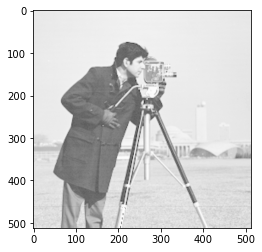

In [65]:
plt.imshow(Image_Log(camera),'gray',vmin=0, vmax=255)

# Enhance the quality of image 'lowcontrastimg' using the best option you know and show the result.

lowcontrastimg = 50+(0.5*camera)

plt.imshow(lowcontrastimg,'gray',vmin=0, vmax=255)

plt.show()

.....
.....
.....
.....

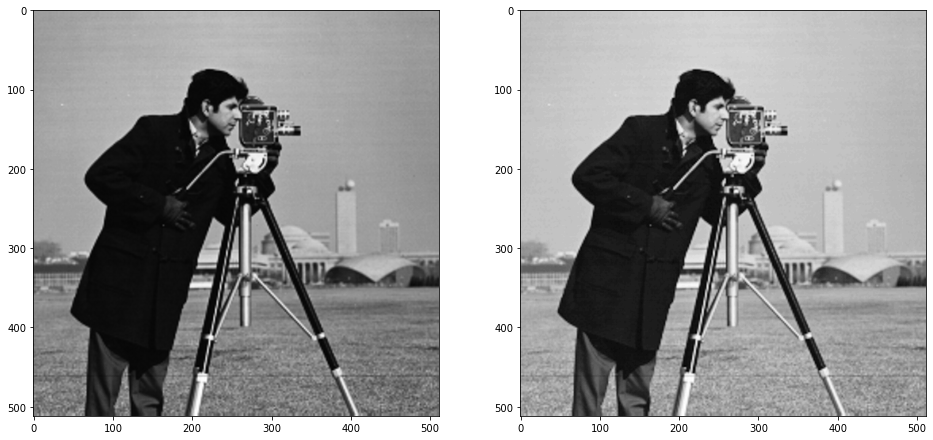

In [67]:
lowcontrastimg = 50+(0.5*camera)
Enhanced = exposure.adjust_gamma(lowcontrastimg,10)
Enhanced = Image_Log(Enhanced)
fig2, (ax11,ax22) = plt.subplots(1, 2)
fig2.set_size_inches(16, 8)
ax11.imshow(lowcontrastimg, cmap=plt.cm.gray)
ax22.imshow(Enhanced, cmap=plt.cm.gray)
plt.show()

# Task3: Implement Gamma transformation Function to image?

### Power-low(Gamma) Transformation:
      Power-law (gamma) transformations can be mathematically expressed as s = cr^{gamma}. Gamma correction is important for displaying images on a screen correctly, to prevent darkening of images when viewed from different types of monitors with different display settings. 

<ipython-input-63-e64522fa10db>:5: RuntimeWarning: divide by zero encountered in log
  log_value = c * np.log(1+img)


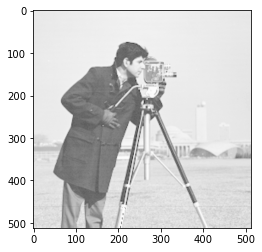

In [69]:
def image_Gamma(img,r):
    # Apply gamma correction.
        
    max_pixel_value = np.max(img)
    c = (255/255) * img
    gamma_value = c * exp(img,r)
    
    image = np.array(gamma_value, dtype=np.uint8)
    
    return image
plt.imshow(piece_wise(camera,70,30,140,255),'gray',vmin=0, vmax=255)

# Display Histogram of grey values:

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0.5, 1.0, 'Histogram of grey values')

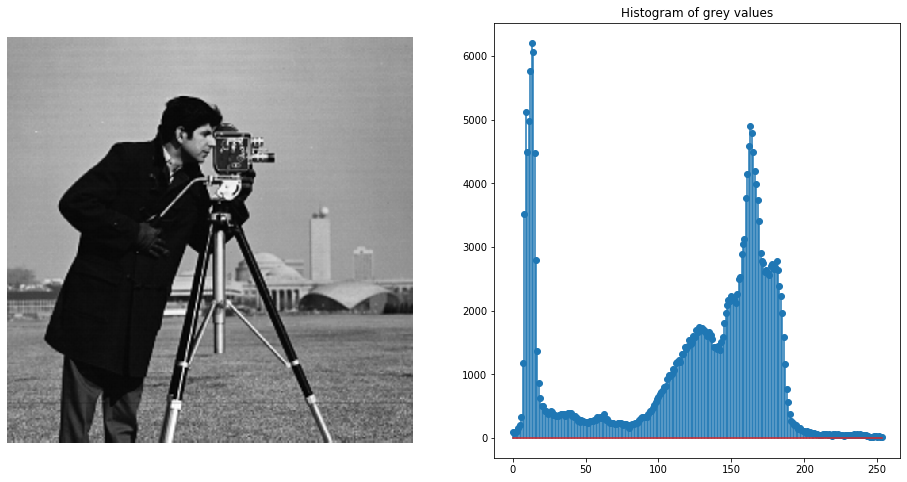

In [30]:
hist = np.histogram(camera, bins=np.arange(0, 255))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
ax1.imshow(camera, interpolation='nearest', cmap=plt.cm.gray)
ax1.axis('off')
ax2.stem(hist[1][:-1], hist[0])
ax2.set_title('Histogram of grey values')

# Display histogram equalization:

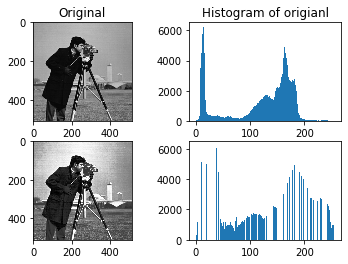

In [26]:
eq =np.asarray(equalize_hist(camera) * 255, dtype='uint8')

subplot(221); imshow(camera, cmap=get_cmap('gray')); title('Original')
subplot(222); hist(camera.flatten(), 255, range=(0,255)); title('Histogram of origianl')
subplot(223); imshow(eq, cmap=get_cmap('gray'));  
subplot(224); hist(eq.flatten(), 255, range=(0,255));  
show()

## Piece-wise linear Transformation:
     The figure below shows the graph corresponding to the contrast stretching.
    With (r1, s1), (r2, s2) as parameters, the function stretches the intensity levels by essentially decreasing the intensity of the dark pixels and increasing the intensity of the light pixels.      


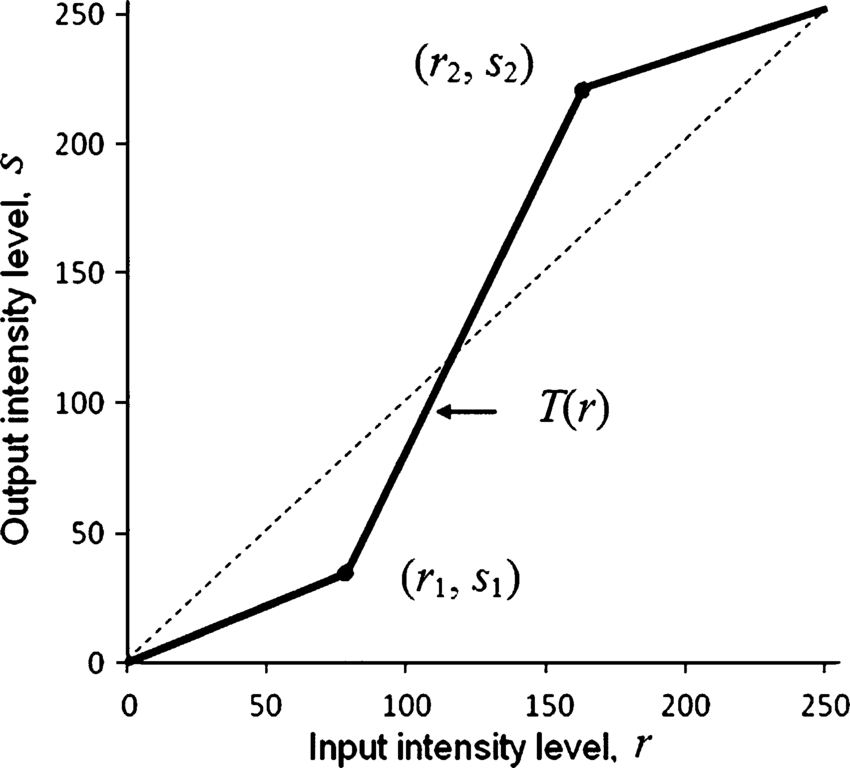

In [38]:
from IPython.display import Image
Image(filename='F:\\Digital image processing\\Labs\\contrast_stretching.PNG')

# Task4: Predict the camera man coat prominent intensity using Piece-wise linear transformation and show the result?

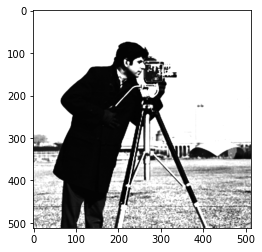

In [83]:
# Function to map each intensity level to output intensity level.
def piece_wise(img,r1,s1,r2,s2):
    slope1 = (s1)/(r1)
    slope2 = (s2-s1)/(r2-r1)
    slope3 = (255-s2)/(255-r2)
    
    image = np.copy(img)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] > 0 and image[i][j] <= r1:
                image[i][j] = slope1 * image[i][j]
            elif image[i][j] > r1 and image[i][j] < r2:
                image[i][j] = (slope2 )* (image[i][j] - r1)+s1 
            elif image[i][j] >= r2:
                image[i][j] = slope3 * (image[i][j] - r2)+s2 
    
    return image
plt.imshow(camera,'gray',vmin=0, vmax=255)
plt.imshow(piece_wise(camera,70,30,140,255),'gray',vmin=0, vmax=255)

# Task 5: Convert iamge to black and white where coat is dark and everything else is white. Show the result?

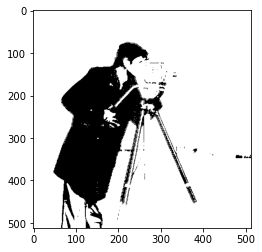

In [86]:
# Function to map each intensity level to output intensity level.
def piece_Wise(img,r1,r2):
    
    image = np.copy(img)
    
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            if image[i][j] >= r1 and image[i][j] <= r2:
                image[i][j] = 0
            else:
                image[i][j] = 255
    return image
plt.imshow(camera,'gray',vmin=0, vmax=255)
plt.imshow(piece_Wise(camera,7,25),'gray',vmin=0, vmax=255)